In [1]:
using Revise

In [2]:
using MeshCatMechanisms
using MeshCat
using RigidBodyDynamics
using Flux
using ProgressMeter
using MLDataPattern
using JLD2
using Plots; gr()
using LCPSim
using LearningMPC
using LearningMPC.Models

INFO: Recompiling stale cache file /home/rdeits/locomotion/explorations/learning-mpc-2/packages/lib/v0.6/LearningMPC.ji for module LearningMPC.


In [3]:
robot = BoxAtlas()
mvis = MechanismVisualizer(robot)
IJuliaCell(mvis)

Listening on 127.0.0.1:7023...
zmq_url=tcp://127.0.0.1:6023
web_url=http://127.0.0.1:7023/static/


MeshCat.IJuliaCell(MeshCat.ViewerWindow(ZMQ.Context(Ptr{Void} @0x0000000006b7b560, ZMQ.Socket[ZMQ.Socket(Ptr{Void} @0x0000000006c02e80, Base.Filesystem._FDWatcher(Ptr{Void} @0x00000000069b1da0, 101, (1, 0), Condition(Any[]), (false, false), 0))]), ZMQ.Socket(Ptr{Void} @0x0000000006c02e80, Base.Filesystem._FDWatcher(Ptr{Void} @0x00000000069b1da0, 101, (1, 0), Condition(Any[]), (false, false), 0)), "http://127.0.0.1:7023/static/", "tcp://127.0.0.1:6023", MeshCat.ZMQServer.ZMQWebSocketBridge(ip"127.0.0.1", Set{WebSockets.WebSocket}(), MeshCat.SceneTrees.SceneNode(Nullable{Array{UInt8,1}}(), Nullable{Array{UInt8,1}}(), Dict("meshcat"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0xa8, 0x2f, 0x6d, 0x65, 0x73, 0x68, 0x63, 0x61, 0x74], Dict("world"=>MeshCat.SceneTrees.SceneNode(#NULL, #NULL, Dict("root"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x77, 0x6f, 0x72, 0x6c, 0x64, 0x2f, 0x72, 0x6f, 0x6f, 0x74], Dict("floor"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x6f, 0x6f, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict("after_root_to_floor"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x74, 0x5f, 0x74, 0x6f, 0x5f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict("geometry_1"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], Dict{String,MeshCat.SceneTrees.SceneNode}()))))),"core"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x2f, 0x72, 0x6f, 0x6f, 0x74, 0x2f, 0x63, 0x6f, 0x72, 0x65], Dict("rh_dummy"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x2f, 0x72, 0x68, 0x5f, 0x64, 0x75, 0x6d, 0x6d, 0x79], Dict("after_core_to_rh_rotation"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x5f, 0x72, 0x6f, 0x74, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict("geometry_4"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x34], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x34], Dict{String,MeshCat.SceneTrees.SceneNode}()))),"rh"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x5f, 0x64, 0x75, 0x6d, 0x6d, 0x79, 0x2f, 0x72, 0x68], Dict("after_core_to_rh_extension"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x65, 0x78, 0x74, 0x65, 0x6e, 0x73, 0x69, 0x6f, 0x6e], Dict("geometry_5"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x35], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x35], Dict{String,MeshCat.SceneTrees.SceneNode}()))))))),"after_floating_base"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x61, 0x74, 0x69, 0x6e, 0x67, 0x5f, 0x62, 0x61, 0x73, 0x65], Dict("geometry_3"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], Dict{String,MeshCat.SceneTrees.SceneNode}()))),"rf_dummy"=>MeshCat.SceneTrees.SceneNode

In [4]:
params = MPCParams(robot)
lqrsol = LQRSolution(robot, params, false)
net, loss = LearningMPC.interval_net([22, 64, 64, 1])
optimizer = Flux.ADAM(Flux.params(net))

net_cost = LearningMPC.LearnedCost(lqrsol, net)

net_mpc_params = MPCParams(robot)
net_mpc_params.horizon = 1
net_mpc_controller = MPCController(robot, net_mpc_params, net_cost, [lqrsol]);

full_mpc_controller = MPCController(robot, params, lqrsol, [lqrsol, net_mpc_controller]);

lqr_mpc_controller = MPCController(robot, (p = MPCParams(robot); p.horizon=1; p), lqrsol, [lqrsol])

(::MPCController) (generic function with 1 method)

In [5]:
sample_sink = LearningMPC.MPCSampleSink{Float64}(true)
playback_sink = LearningMPC.PlaybackSink(mvis, params.Δt)

full_mpc_controller.callback = LearningMPC.call_each(
    sample_sink,
#     playback_sink,
)

live_viewer = LearningMPC.live_viewer(mvis)

dagger_controller = LearningMPC.call_each(
    LearningMPC.dagger_controller(
        full_mpc_controller,
        net_mpc_controller,
        0.2),
    live_viewer
    )

dataset = LearningMPC.Dataset(lqrsol)

x_init = nominal_state(robot)

function collect_into!(data::Vector{<:LearningMPC.Sample}, σv=1.0)
    empty!(sample_sink)
    LearningMPC.randomize!(x0, x_init, 0.0, σv)
    results = LCPSim.simulate(x0, 
        dagger_controller,
        robot.environment, params.Δt, 100, 
        params.lcp_solver;
        termination=x -> configuration(x)[3] > π/4 || configuration(x)[3] < -π/4);
    append!(data, sample_sink.samples)
end

x0 = MechanismState{Float64}(robot.mechanism)

features(s::LearningMPC.Sample) = (s.state, s.mip.objective_bound, s.mip.objective_value)

features (generic function with 1 method)

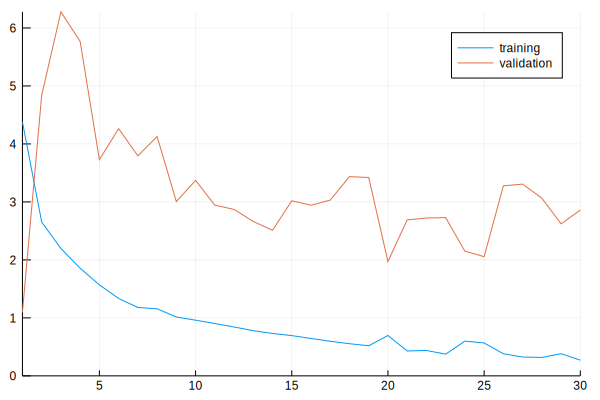

  2.652841 seconds (1.82 M allocations: 119.258 MiB, 2.85% gc time)


Progress:   1%|                                         |  ETA: 19:26:02

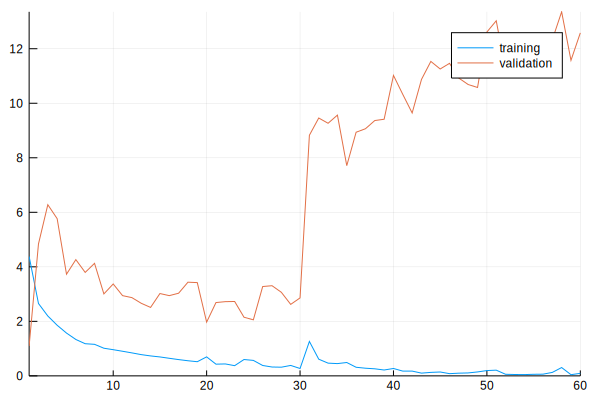

  1.348221 seconds (1.34 M allocations: 118.072 MiB, 3.12% gc time)


Progress:   2%|█                                        |  ETA: 17:25:51

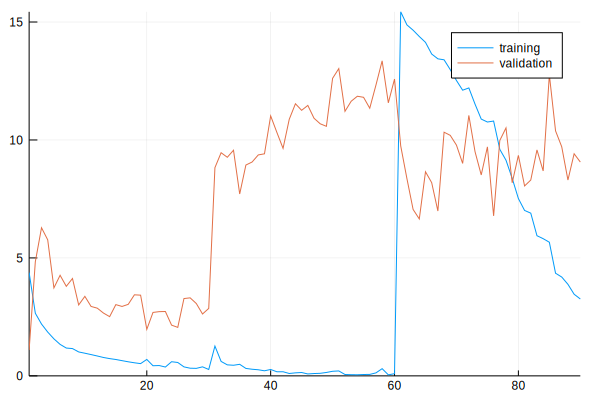

  2.070949 seconds (2.15 M allocations: 189.551 MiB, 3.35% gc time)


Progress:   3%|█                                        |  ETA: 17:44:10

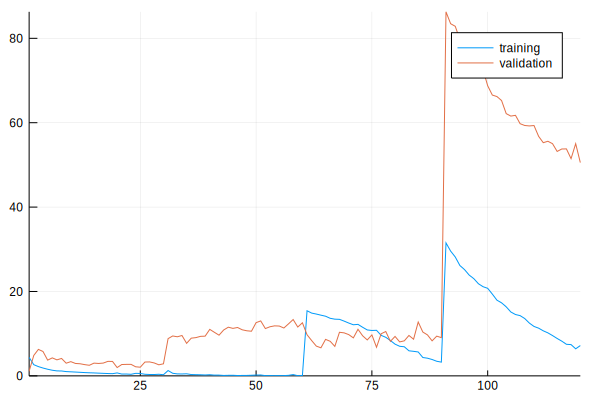

  2.655907 seconds (2.78 M allocations: 245.759 MiB, 2.20% gc time)


Progress:   4%|██                                       |  ETA: 16:46:16

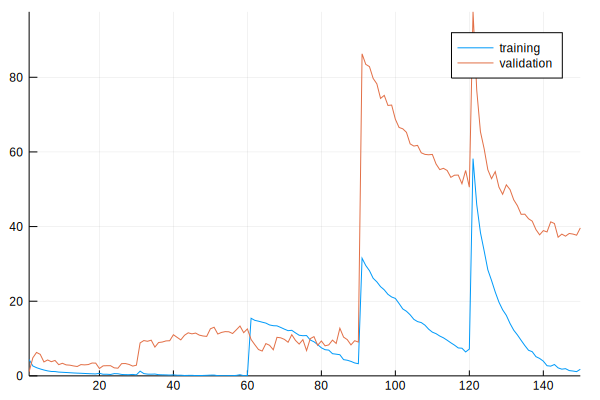

  3.376443 seconds (3.44 M allocations: 303.026 MiB, 3.10% gc time)


Progress:   5%|██                                       |  ETA: 15:38:10

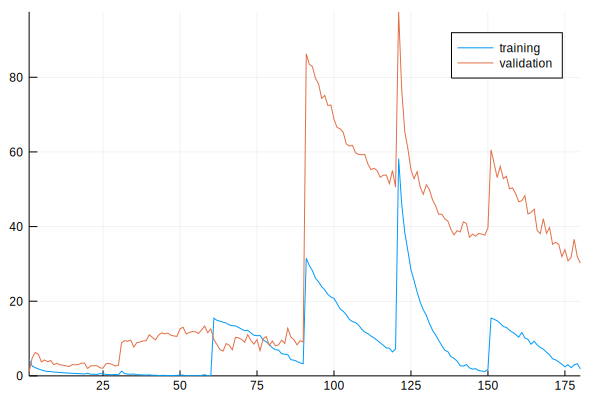

  3.864432 seconds (3.98 M allocations: 350.718 MiB, 2.95% gc time)


Progress:   6%|██                                       |  ETA: 14:42:01

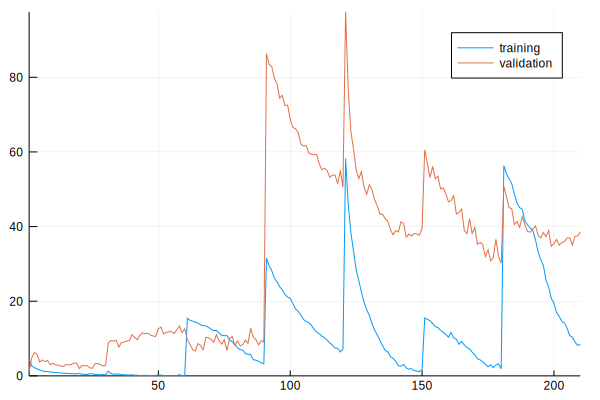

  4.177134 seconds (4.26 M allocations: 375.482 MiB, 3.37% gc time)


Progress:   7%|███                                      |  ETA: 13:15:40

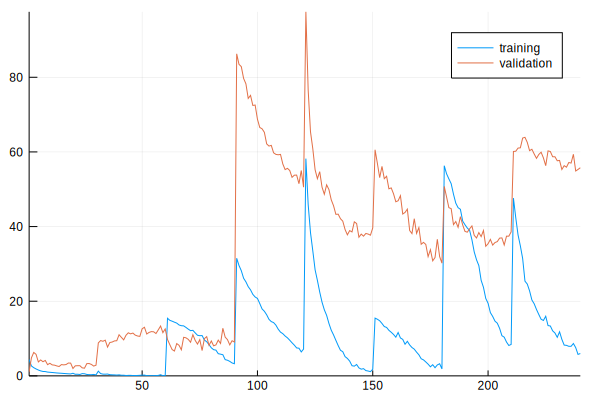

  4.817098 seconds (4.82 M allocations: 424.236 MiB, 3.23% gc time)


Progress:   8%|███                                      |  ETA: 12:44:43

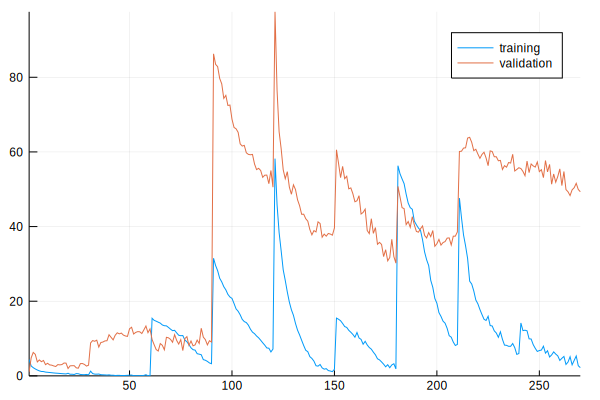

  5.034349 seconds (5.35 M allocations: 470.769 MiB, 2.66% gc time)


Progress:   9%|████                                     |  ETA: 12:21:45

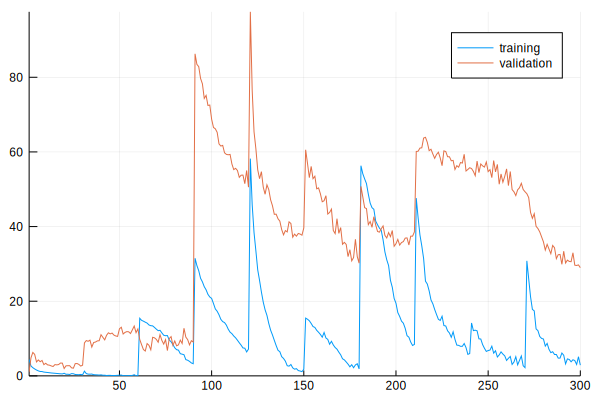

  5.638548 seconds (5.93 M allocations: 521.532 MiB, 3.51% gc time)


Progress:  10%|████                                     |  ETA: 12:26:30

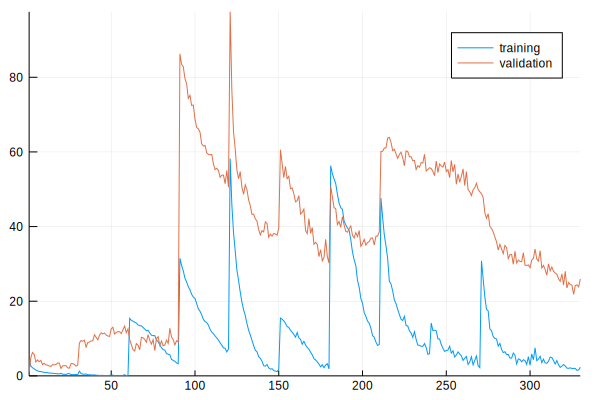

  6.120768 seconds (6.51 M allocations: 572.303 MiB, 3.46% gc time)


Progress:  11%|█████                                    |  ETA: 12:21:33

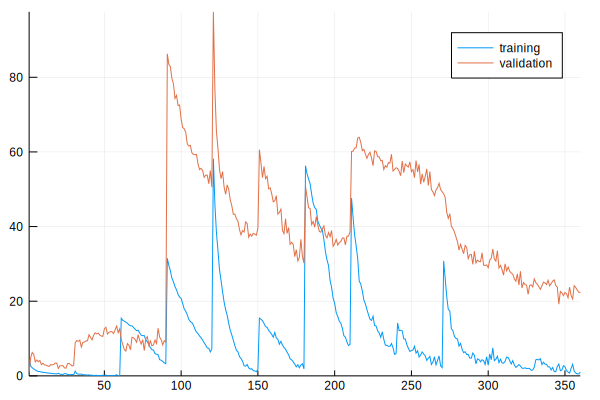

  6.716854 seconds (7.05 M allocations: 620.346 MiB, 3.39% gc time)


Progress:  12%|█████                                    |  ETA: 12:19:43

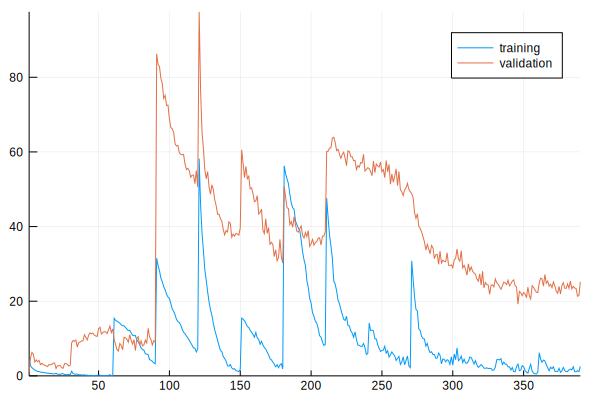

  7.382240 seconds (7.74 M allocations: 681.298 MiB, 3.49% gc time)


Progress:  13%|█████                                    |  ETA: 12:22:22

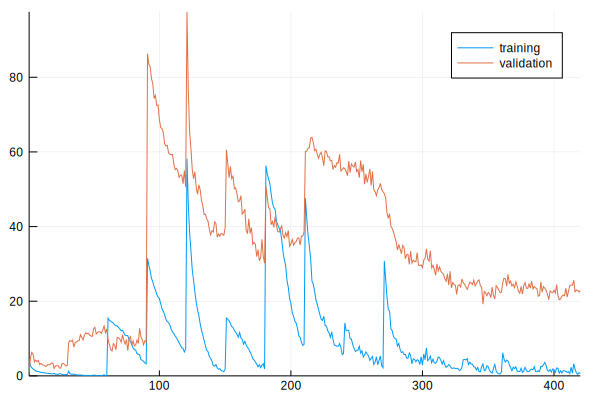

  7.928038 seconds (8.40 M allocations: 739.599 MiB, 3.30% gc time)


Progress:  14%|██████                                   |  ETA: 12:22:59

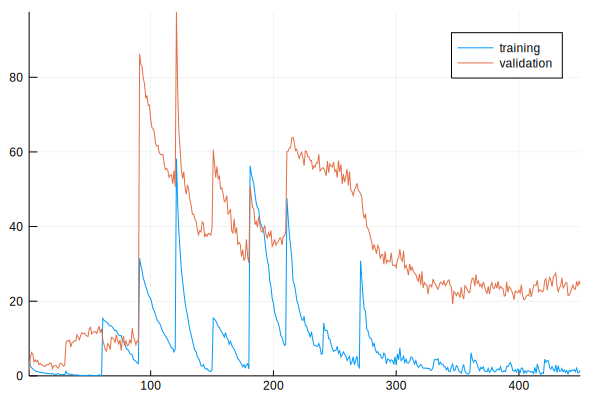

  8.446979 seconds (9.11 M allocations: 801.877 MiB, 3.37% gc time)


Progress:  15%|██████                                   |  ETA: 12:22:31

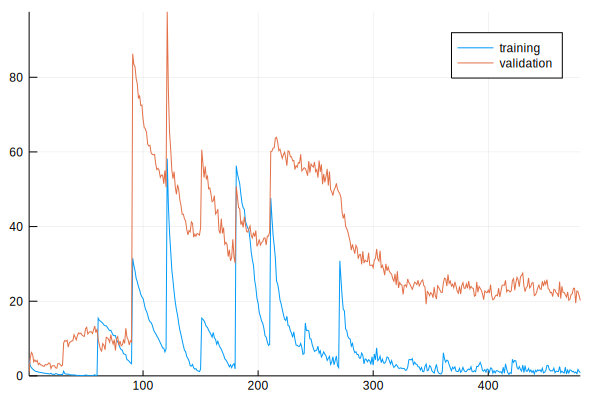

  9.453260 seconds (9.79 M allocations: 861.370 MiB, 3.40% gc time)


Progress:  16%|███████                                  |  ETA: 12:14:53

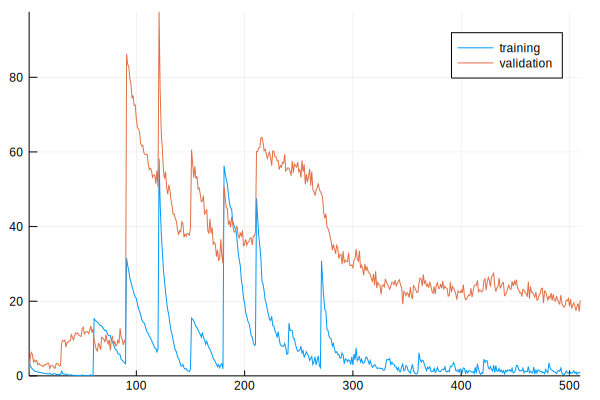

  9.767134 seconds (10.46 M allocations: 921.823 MiB, 2.61% gc time)


Progress:  17%|███████                                  |  ETA: 12:16:55

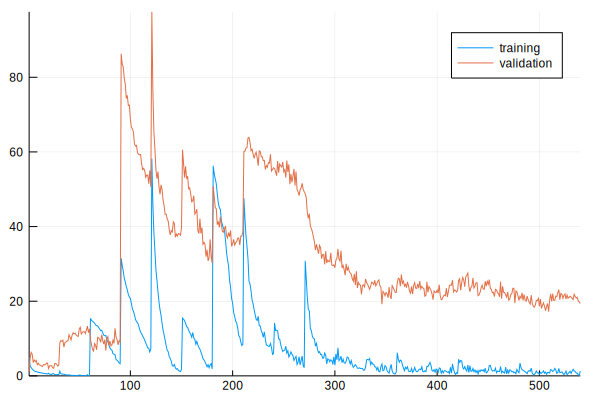

 10.344618 seconds (11.29 M allocations: 994.298 MiB, 2.47% gc time)


Progress:  18%|███████                                  |  ETA: 12:19:11

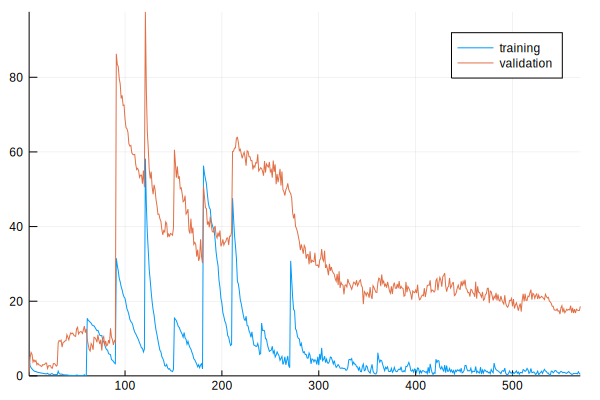

 11.559818 seconds (12.17 M allocations: 1.047 GiB, 3.11% gc time)


Progress:  19%|████████                                 |  ETA: 12:22:20

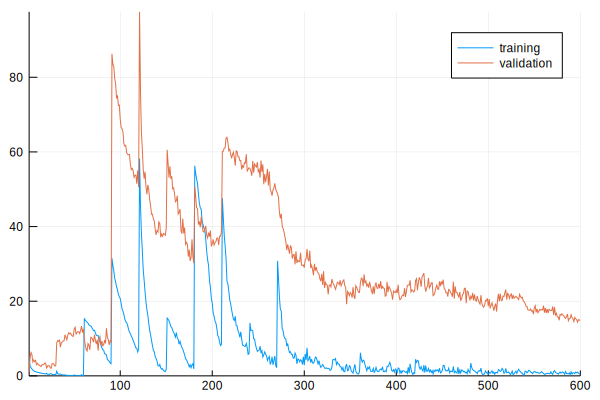

 12.396857 seconds (12.95 M allocations: 1.114 GiB, 2.74% gc time)


Progress:  20%|████████                                 |  ETA: 12:21:31

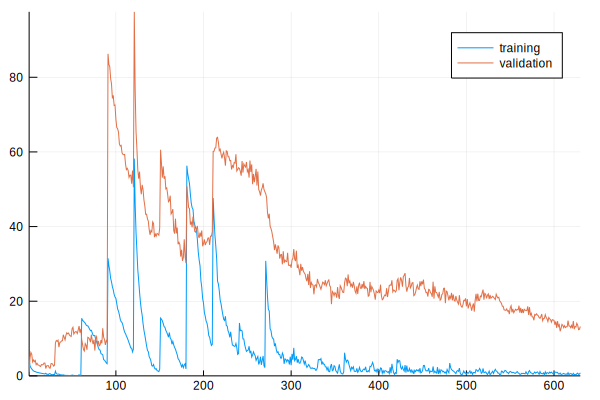

 12.992444 seconds (13.78 M allocations: 1.185 GiB, 3.12% gc time)


Progress:  21%|█████████                                |  ETA: 12:15:59

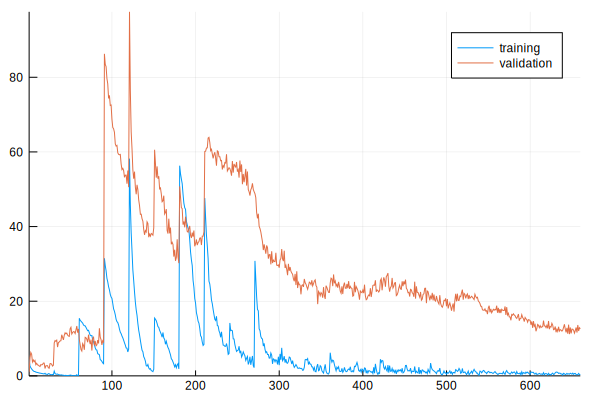

 13.740644 seconds (14.48 M allocations: 1.245 GiB, 3.23% gc time)


Progress:  22%|█████████                                |  ETA: 12:10:07

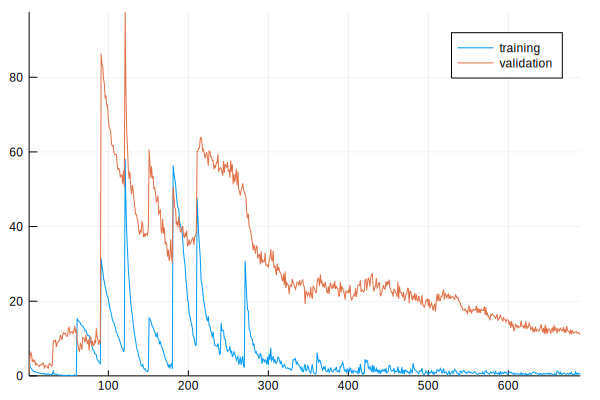

 14.249035 seconds (15.20 M allocations: 1.307 GiB, 3.55% gc time)


Progress:  23%|█████████                                |  ETA: 12:04:42

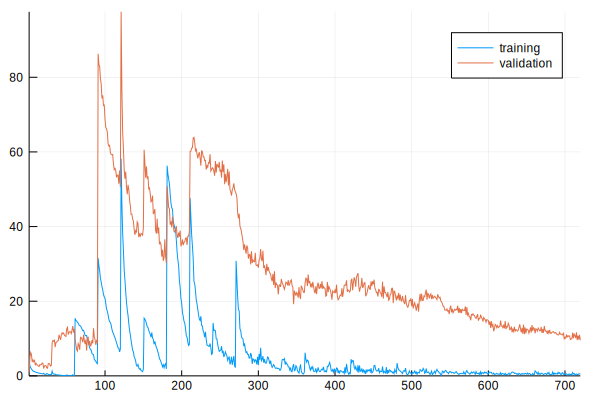

 15.082116 seconds (15.97 M allocations: 1.373 GiB, 2.85% gc time)


Progress:  24%|██████████                               |  ETA: 11:59:34

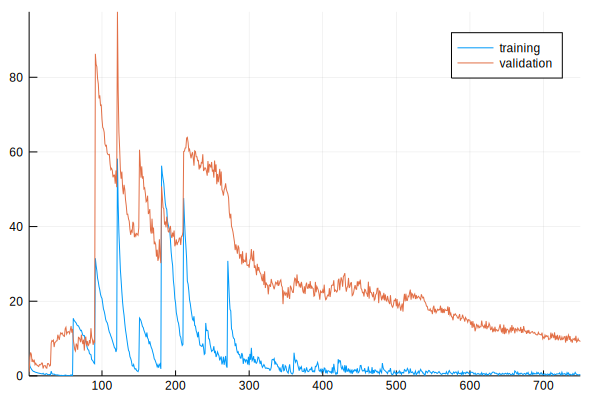

 15.620196 seconds (16.66 M allocations: 1.432 GiB, 2.79% gc time)


Progress:  25%|██████████                               |  ETA: 11:51:25

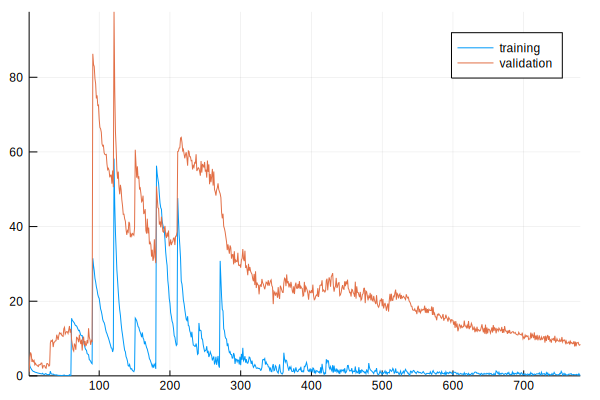

 16.229291 seconds (17.40 M allocations: 1.496 GiB, 2.61% gc time)


Progress:  26%|███████████                              |  ETA: 11:43:10

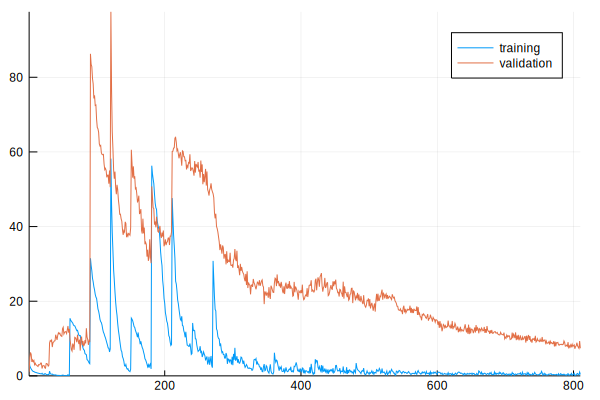

 17.260008 seconds (18.17 M allocations: 1.562 GiB, 3.46% gc time)


Progress:  27%|███████████                              |  ETA: 11:37:01

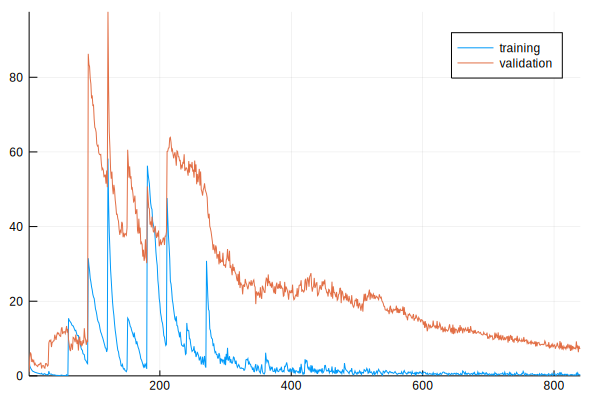

 17.613990 seconds (18.81 M allocations: 1.617 GiB, 2.57% gc time)


Progress:  28%|███████████                              |  ETA: 11:29:27

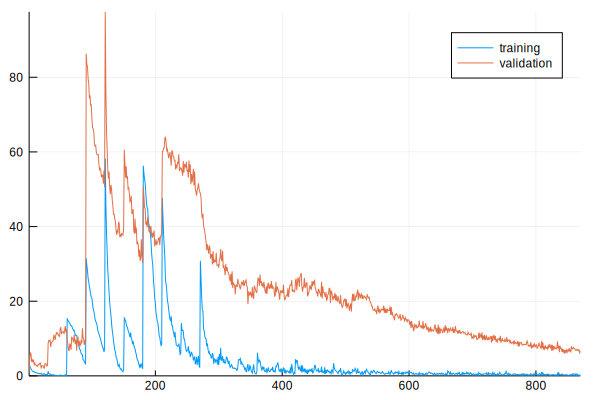

 18.345872 seconds (19.60 M allocations: 1.685 GiB, 2.62% gc time)


Progress:  29%|████████████                             |  ETA: 11:21:33

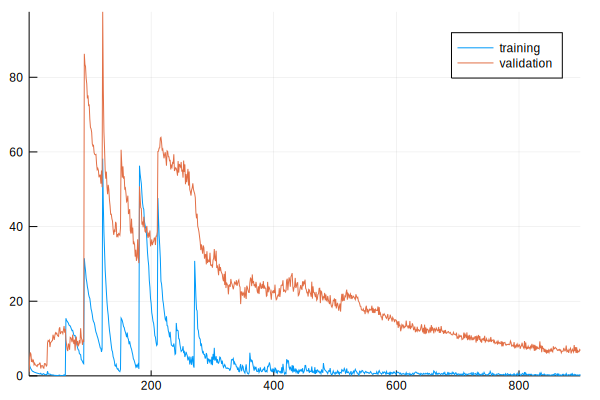

 19.189350 seconds (20.33 M allocations: 1.748 GiB, 3.38% gc time)


Progress:  30%|████████████                             |  ETA: 11:14:34

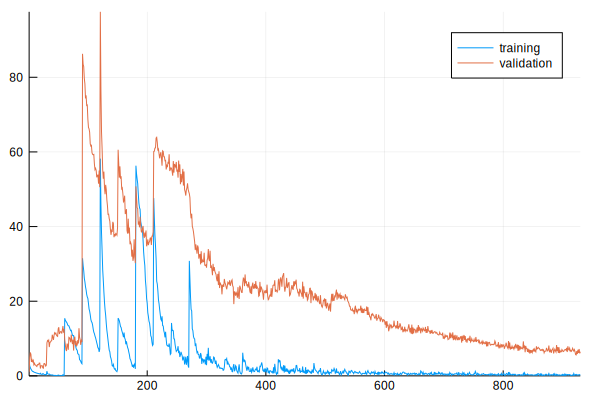

 19.482306 seconds (20.92 M allocations: 1.798 GiB, 2.59% gc time)


Progress:  31%|█████████████                            |  ETA: 11:04:48

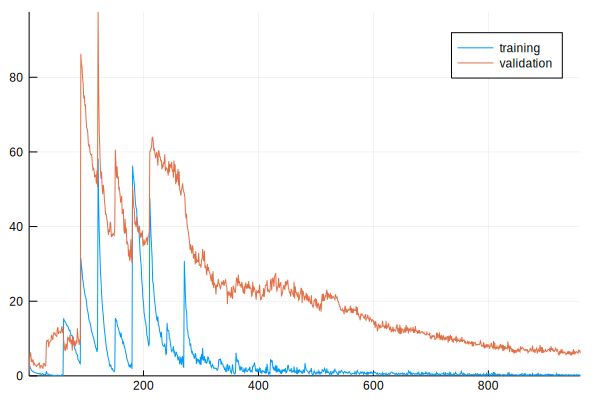

 20.236909 seconds (21.62 M allocations: 1.859 GiB, 2.79% gc time)


Progress:  32%|█████████████                            |  ETA: 10:56:29

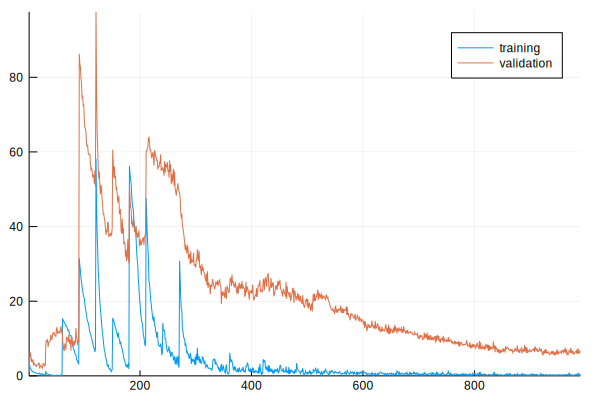

 21.129669 seconds (22.05 M allocations: 1.895 GiB, 3.34% gc time)


Progress:  33%|██████████████                           |  ETA: 10:40:37

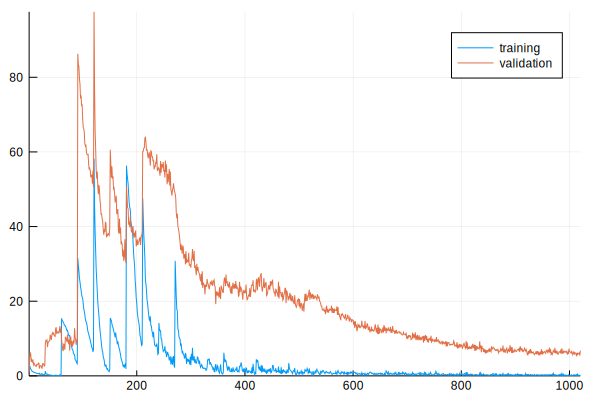

 21.390286 seconds (22.53 M allocations: 1.937 GiB, 3.51% gc time)


Progress:  34%|██████████████                           |  ETA: 10:29:30

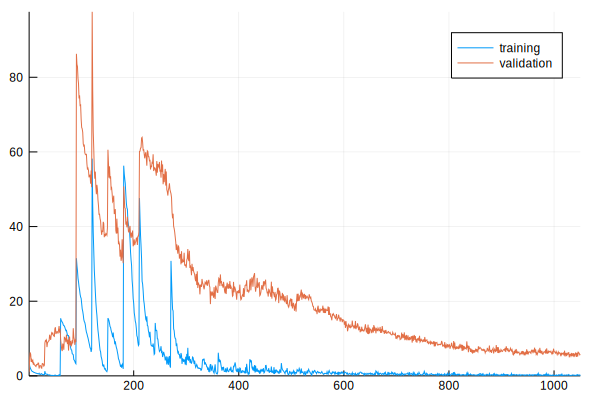

 22.111655 seconds (23.15 M allocations: 1.991 GiB, 3.00% gc time)


Progress:  35%|██████████████                           |  ETA: 10:20:19

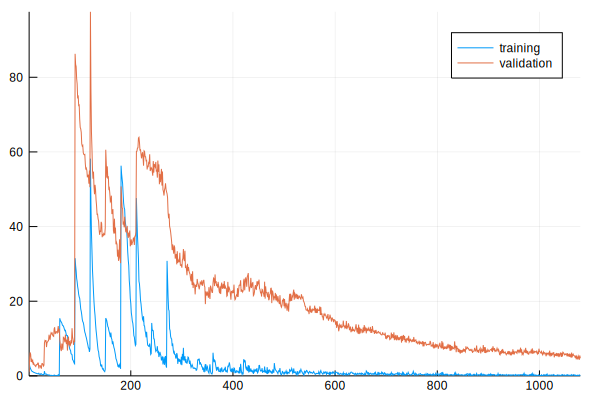

 22.282015 seconds (23.83 M allocations: 2.050 GiB, 2.57% gc time)


Progress:  36%|███████████████                          |  ETA: 10:11:32

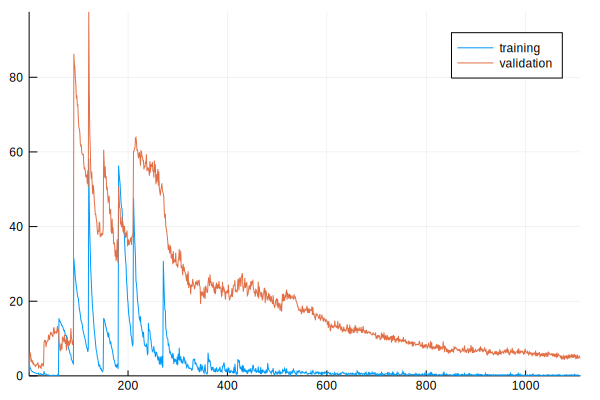

 22.983551 seconds (24.47 M allocations: 2.105 GiB, 2.48% gc time)


Progress:  37%|███████████████                          |  ETA: 10:02:50

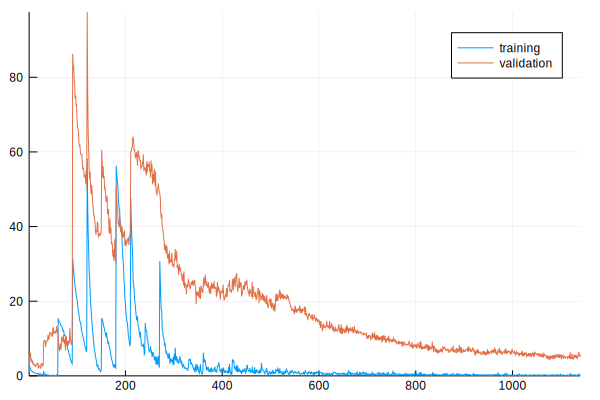

 23.934436 seconds (25.25 M allocations: 2.172 GiB, 3.34% gc time)


Progress:  38%|████████████████                         |  ETA: 9:55:29

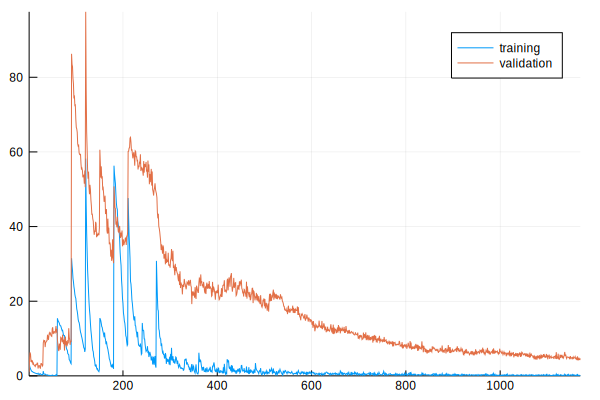

 23.959730 seconds (25.87 M allocations: 2.226 GiB, 2.35% gc time)


Progress:  39%|████████████████                         |  ETA: 9:45:41

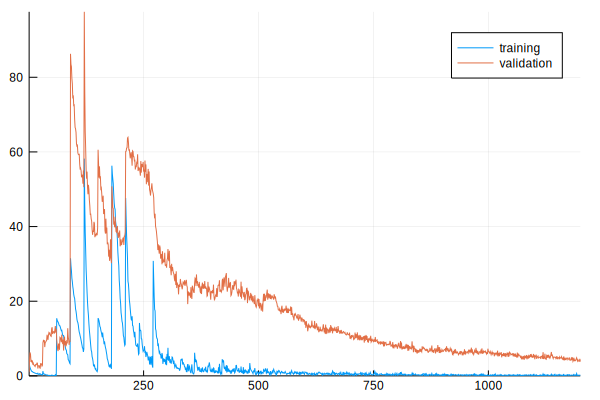

 24.607853 seconds (26.56 M allocations: 2.285 GiB, 2.37% gc time)


Progress:  40%|████████████████                         |  ETA: 9:37:07

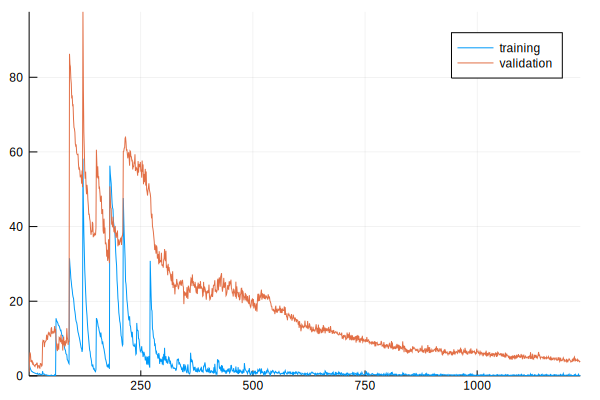

 25.858481 seconds (27.34 M allocations: 2.352 GiB, 3.19% gc time)


Progress:  41%|█████████████████                        |  ETA: 9:29:10

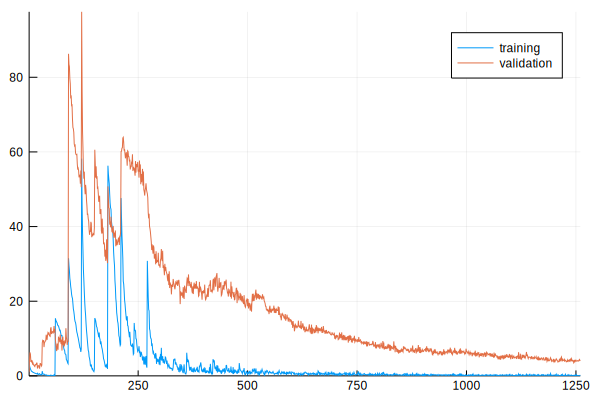

 26.447553 seconds (28.12 M allocations: 2.420 GiB, 3.38% gc time)


Progress:  42%|█████████████████                        |  ETA: 9:20:47

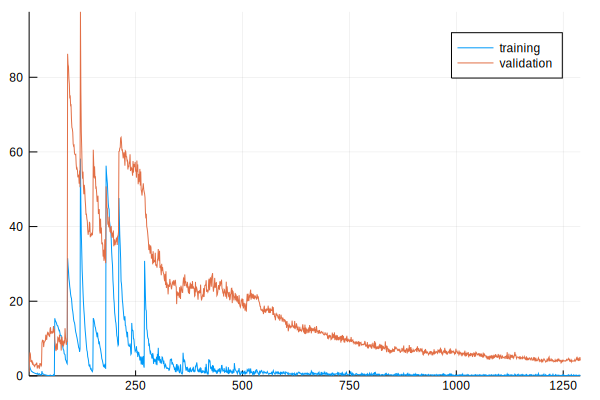

 26.795275 seconds (28.72 M allocations: 2.471 GiB, 2.37% gc time)


Progress:  43%|██████████████████                       |  ETA: 9:10:49

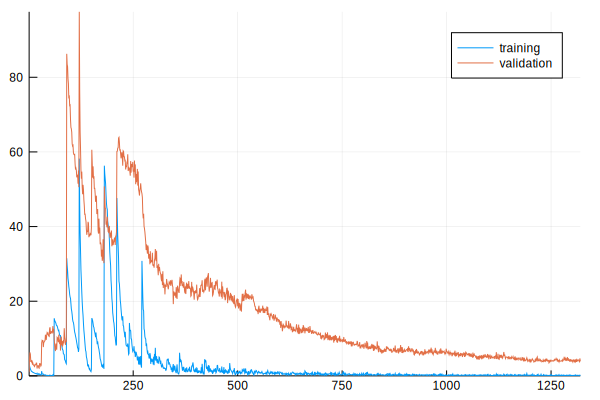

 27.500474 seconds (29.28 M allocations: 2.519 GiB, 3.29% gc time)


Progress:  44%|██████████████████                       |  ETA: 9:01:12

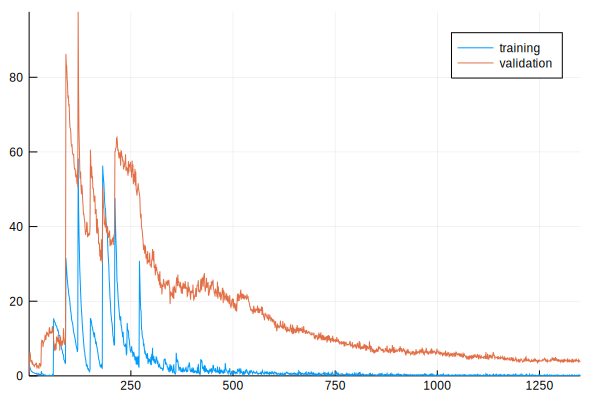

 28.214979 seconds (29.95 M allocations: 2.577 GiB, 3.33% gc time)


Progress:  45%|██████████████████                       |  ETA: 8:52:30

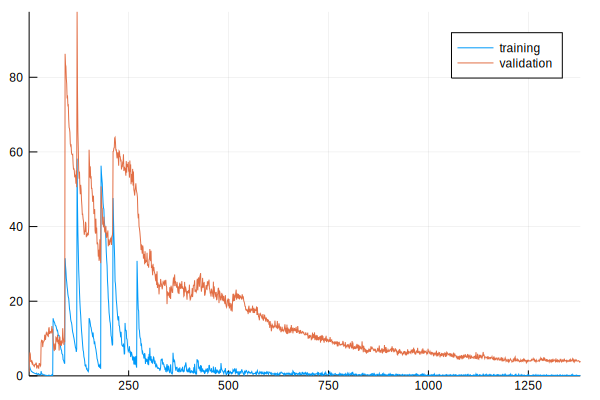

 29.618716 seconds (30.89 M allocations: 2.658 GiB, 2.79% gc time)


Progress:  46%|███████████████████                      |  ETA: 8:47:40

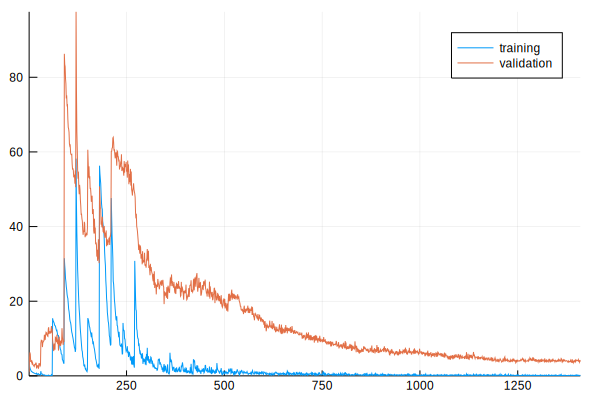

 29.602366 seconds (31.63 M allocations: 2.722 GiB, 3.06% gc time)


Progress:  47%|███████████████████                      |  ETA: 8:40:03

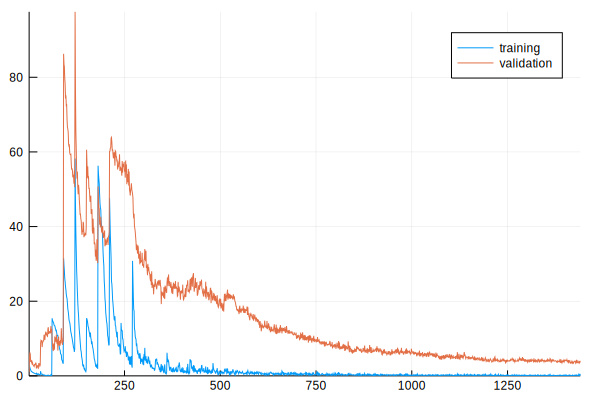

 30.553827 seconds (32.39 M allocations: 2.788 GiB, 3.50% gc time)


Progress:  48%|████████████████████                     |  ETA: 8:31:29

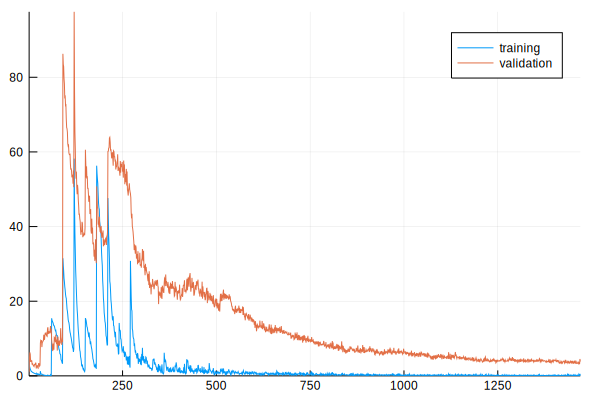

 31.169078 seconds (33.13 M allocations: 2.851 GiB, 3.52% gc time)


Progress:  49%|████████████████████                     |  ETA: 8:23:02

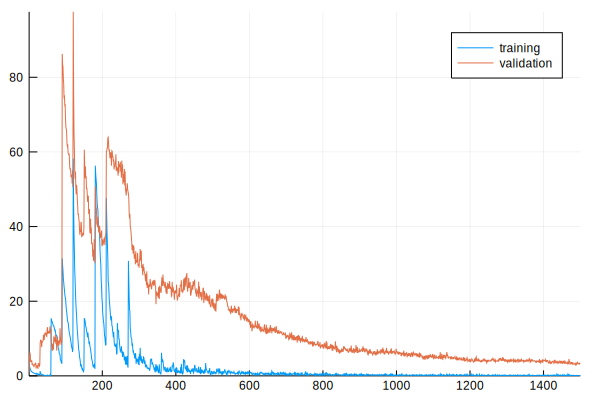

 31.886634 seconds (33.98 M allocations: 2.924 GiB, 3.07% gc time)


Progress:  50%|████████████████████                     |  ETA: 8:14:30

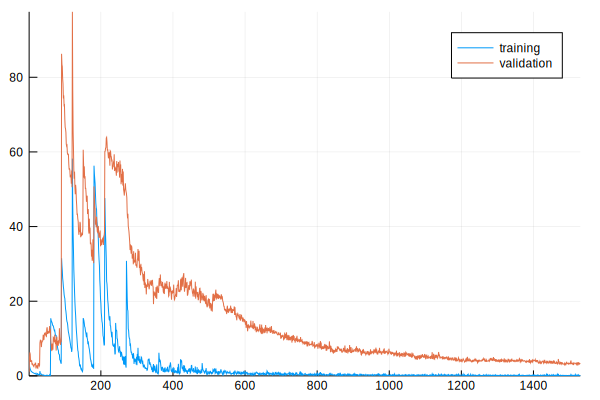

 32.919787 seconds (34.83 M allocations: 2.997 GiB, 2.85% gc time)


Progress:  51%|█████████████████████                    |  ETA: 8:05:51

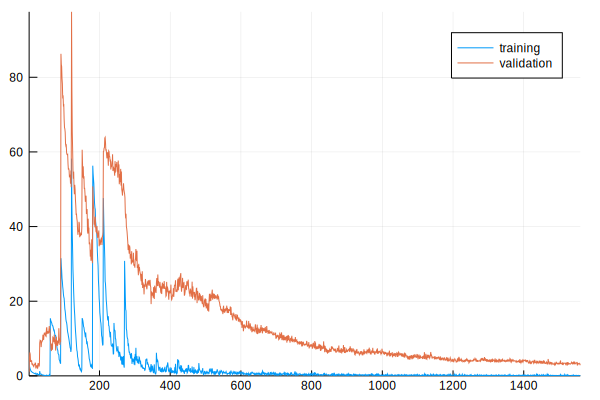

 33.375397 seconds (35.63 M allocations: 3.065 GiB, 2.53% gc time)


Progress:  52%|█████████████████████                    |  ETA: 7:57:20

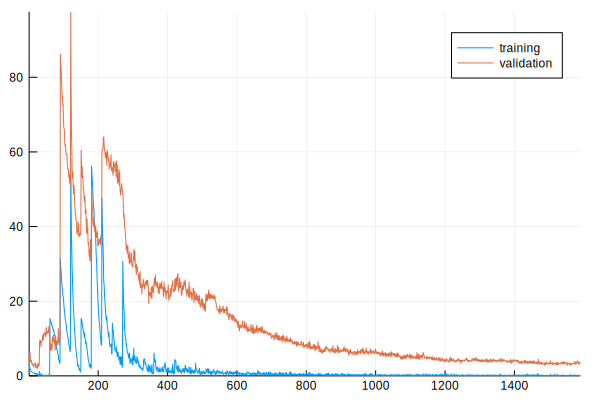

 34.297819 seconds (36.52 M allocations: 3.142 GiB, 3.30% gc time)


Progress:  53%|██████████████████████                   |  ETA: 7:49:38

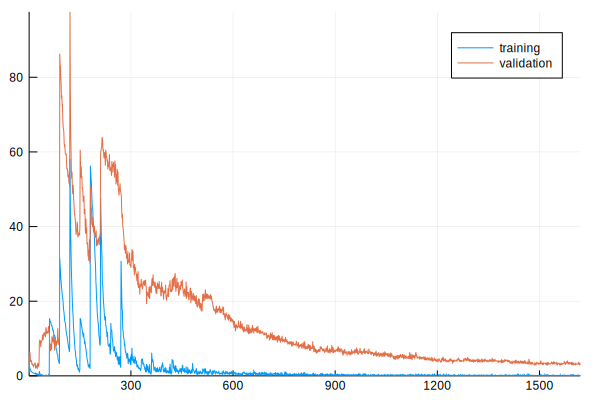

 34.850992 seconds (37.18 M allocations: 3.199 GiB, 3.48% gc time)


Progress:  54%|██████████████████████                   |  ETA: 7:39:20

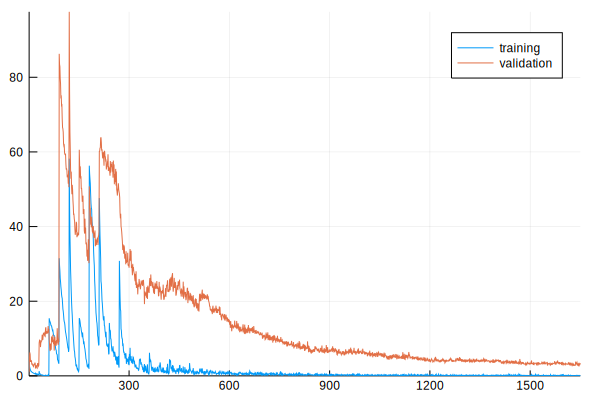

 35.898774 seconds (37.94 M allocations: 3.265 GiB, 3.31% gc time)


Progress:  55%|███████████████████████                  |  ETA: 7:30:32

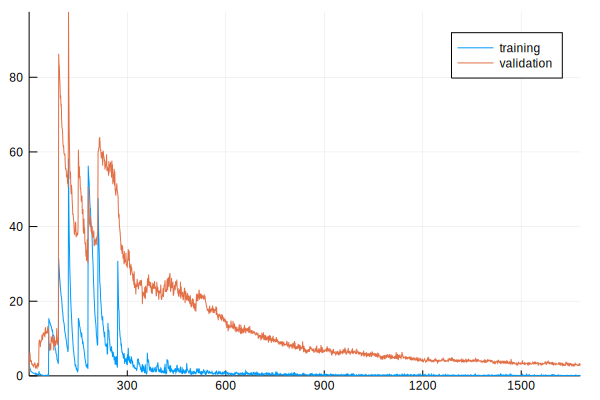

 35.944557 seconds (38.62 M allocations: 3.323 GiB, 2.86% gc time)


Progress:  56%|███████████████████████                  |  ETA: 7:20:32

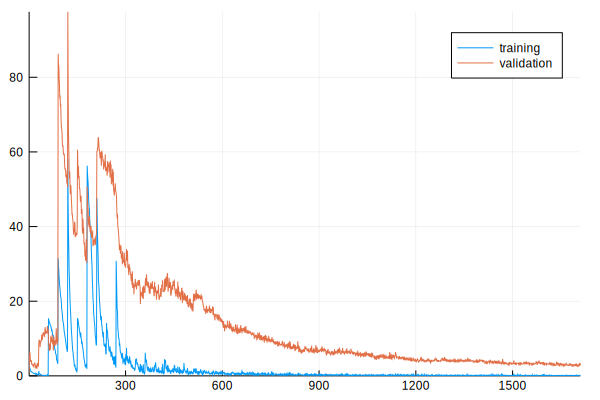

 36.941518 seconds (39.03 M allocations: 3.359 GiB, 2.87% gc time)


Progress:  57%|███████████████████████                  |  ETA: 7:08:39

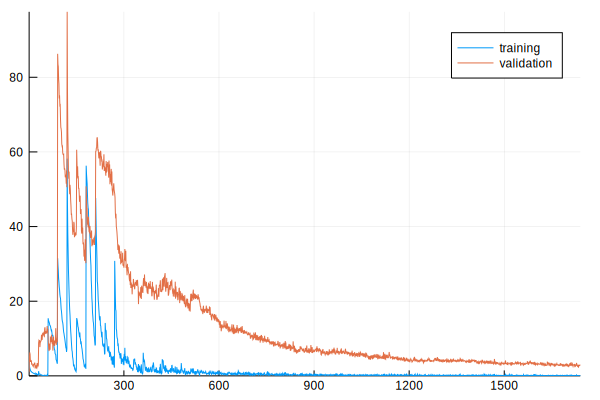

 37.626617 seconds (39.79 M allocations: 3.424 GiB, 2.84% gc time)


Progress:  58%|████████████████████████                 |  ETA: 6:59:47

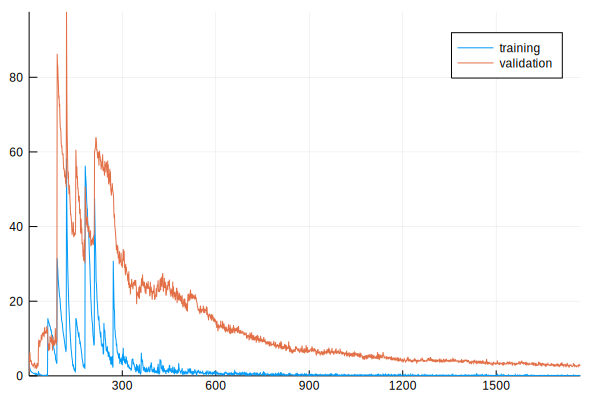

 37.798615 seconds (40.63 M allocations: 3.496 GiB, 2.51% gc time)


Progress:  59%|████████████████████████                 |  ETA: 6:50:45

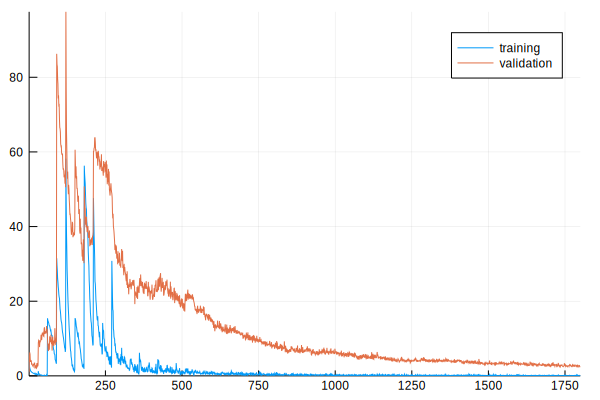

 39.039931 seconds (41.45 M allocations: 3.566 GiB, 2.66% gc time)


Progress:  60%|█████████████████████████                |  ETA: 6:41:55

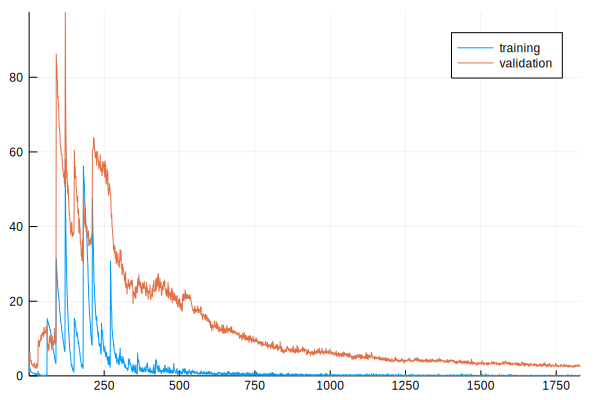

 39.761938 seconds (42.11 M allocations: 3.623 GiB, 3.17% gc time)


Progress:  61%|█████████████████████████                |  ETA: 6:31:31

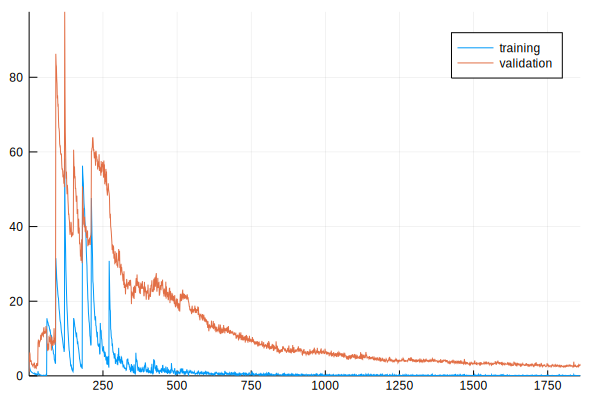

 40.529646 seconds (42.86 M allocations: 3.688 GiB, 3.35% gc time)


Progress:  62%|█████████████████████████                |  ETA: 6:21:52

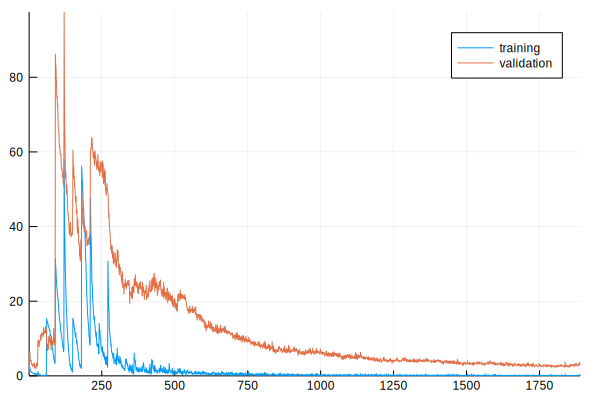

 40.718166 seconds (43.46 M allocations: 3.739 GiB, 2.35% gc time)


Progress:  63%|██████████████████████████               |  ETA: 6:11:44

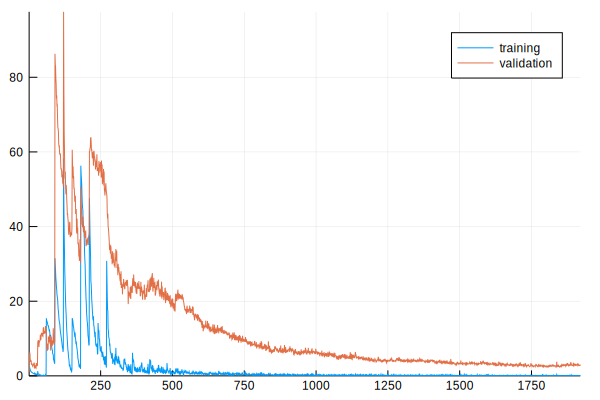

 41.468006 seconds (44.21 M allocations: 3.803 GiB, 3.34% gc time)


Progress:  64%|██████████████████████████               |  ETA: 6:02:26

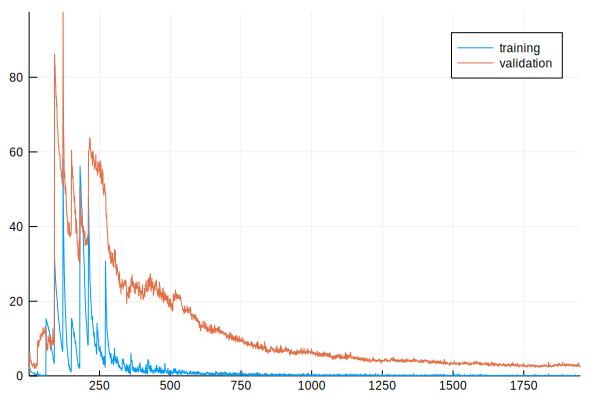

 42.423452 seconds (44.98 M allocations: 3.870 GiB, 3.47% gc time)


Progress:  65%|███████████████████████████              |  ETA: 5:52:57

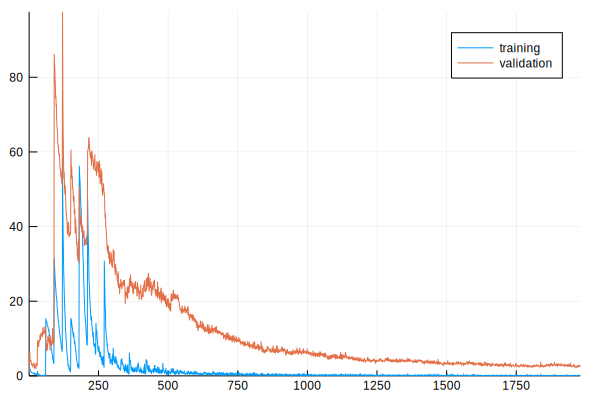

 42.506416 seconds (45.55 M allocations: 3.919 GiB, 3.29% gc time)


Progress:  66%|███████████████████████████              |  ETA: 5:42:29

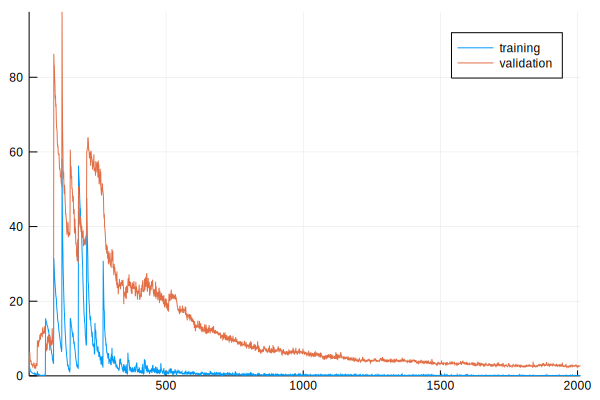

 43.934649 seconds (46.15 M allocations: 3.970 GiB, 3.29% gc time)


Progress:  67%|███████████████████████████              |  ETA: 5:32:21

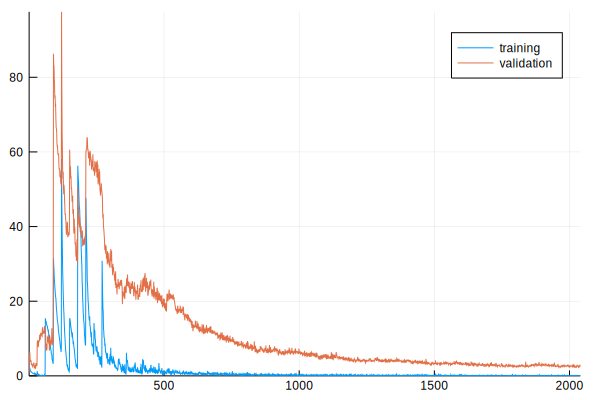

 44.469864 seconds (46.92 M allocations: 4.036 GiB, 3.57% gc time)


Progress:  68%|████████████████████████████             |  ETA: 5:22:47

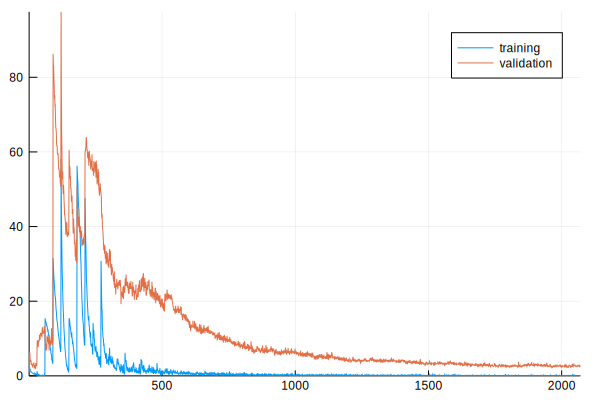

 44.359491 seconds (47.52 M allocations: 4.088 GiB, 2.63% gc time)


Progress:  69%|████████████████████████████             |  ETA: 5:12:29

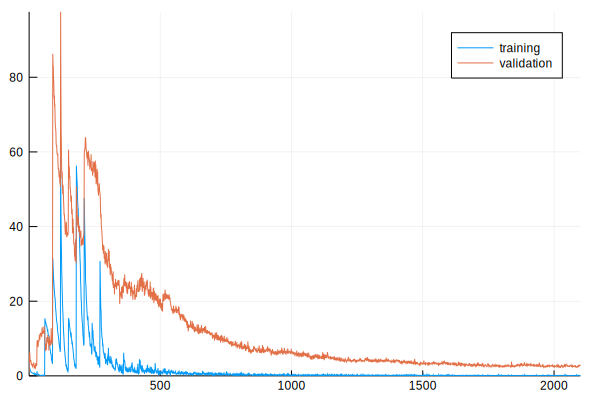

 45.772909 seconds (48.27 M allocations: 4.153 GiB, 3.38% gc time)


Progress:  70%|█████████████████████████████            |  ETA: 5:02:53

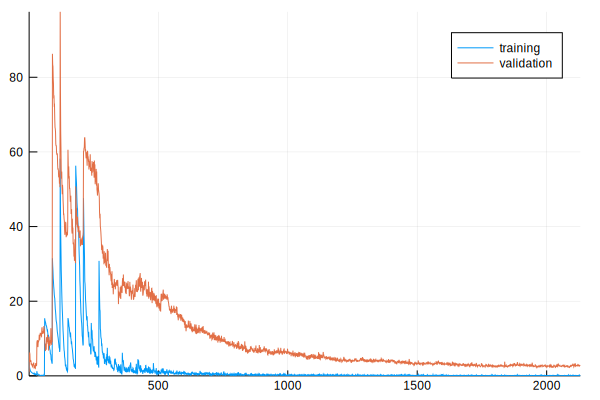

 46.574092 seconds (49.11 M allocations: 4.225 GiB, 3.52% gc time)


Progress:  71%|█████████████████████████████            |  ETA: 4:53:40

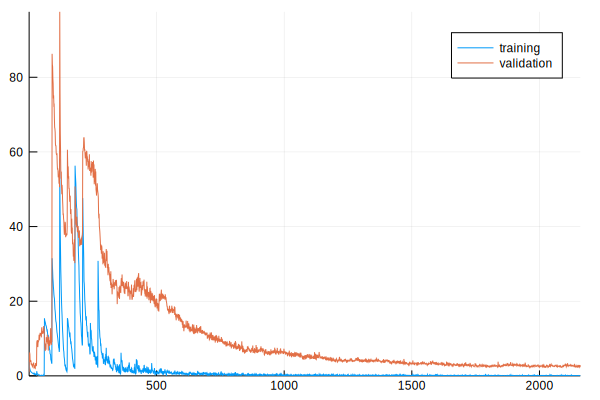

 46.657398 seconds (49.91 M allocations: 4.294 GiB, 2.66% gc time)


Progress:  72%|██████████████████████████████           |  ETA: 4:44:25

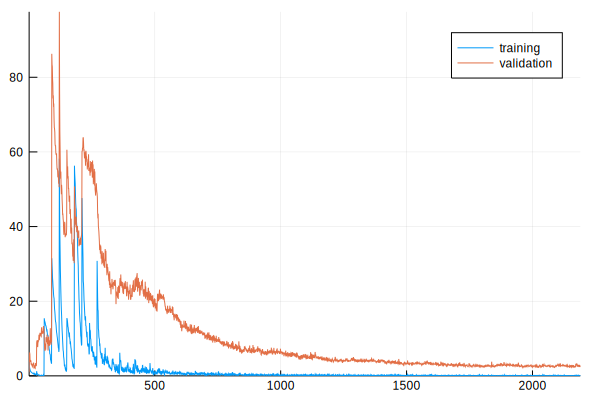

 48.893025 seconds (50.59 M allocations: 4.352 GiB, 3.50% gc time)


Progress:  73%|██████████████████████████████           |  ETA: 4:34:20

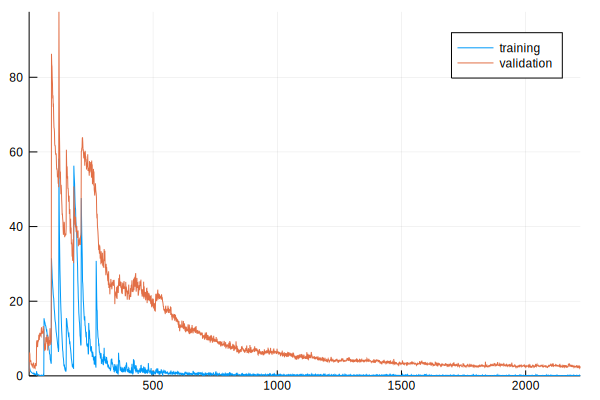

 48.566869 seconds (51.29 M allocations: 4.413 GiB, 3.50% gc time)


Progress:  74%|██████████████████████████████           |  ETA: 4:24:28

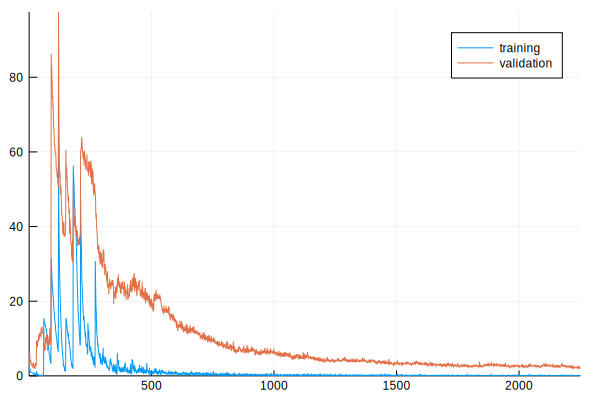

 49.149294 seconds (52.11 M allocations: 4.483 GiB, 3.04% gc time)


Progress:  75%|███████████████████████████████          |  ETA: 4:14:42

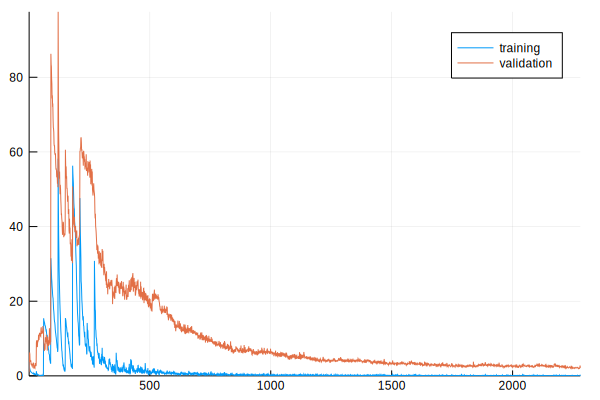

 49.585676 seconds (52.55 M allocations: 4.522 GiB, 3.53% gc time)


Progress:  76%|███████████████████████████████          |  ETA: 4:04:05

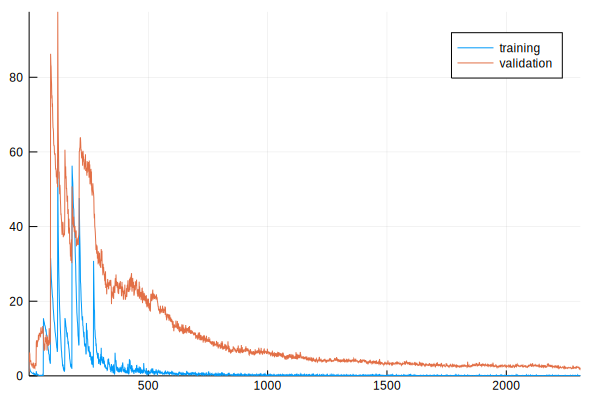

 50.229817 seconds (53.26 M allocations: 4.582 GiB, 3.46% gc time)


Progress:  77%|████████████████████████████████         |  ETA: 3:54:03

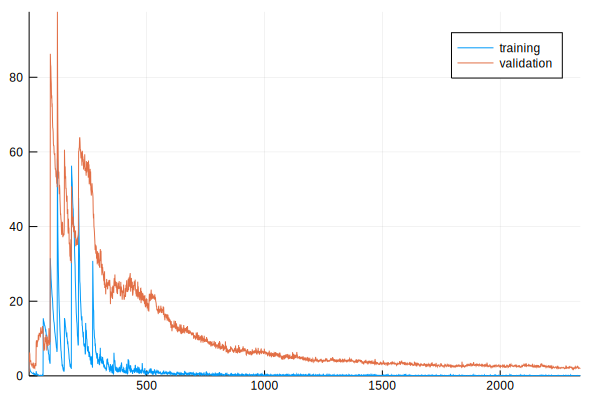

 51.420267 seconds (53.88 M allocations: 4.636 GiB, 3.28% gc time)


Progress:  78%|████████████████████████████████         |  ETA: 3:43:59

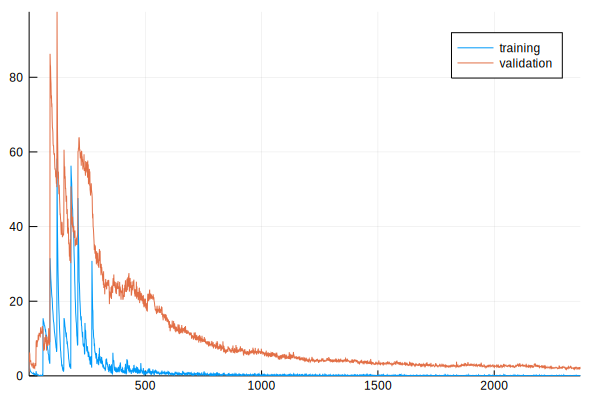

 52.000702 seconds (54.53 M allocations: 4.692 GiB, 3.96% gc time)


Progress:  79%|████████████████████████████████         |  ETA: 3:34:08

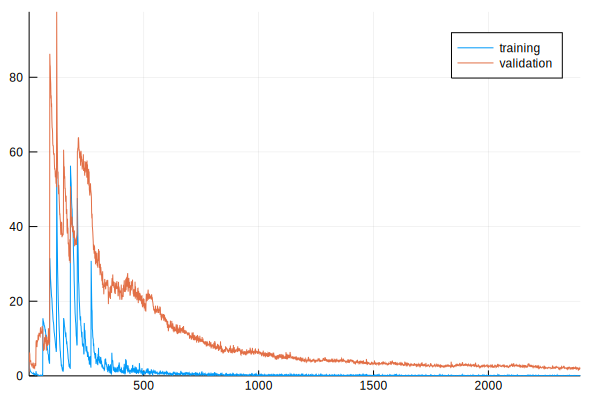

 52.011895 seconds (54.98 M allocations: 4.731 GiB, 3.55% gc time)


Progress:  80%|█████████████████████████████████        |  ETA: 3:23:38

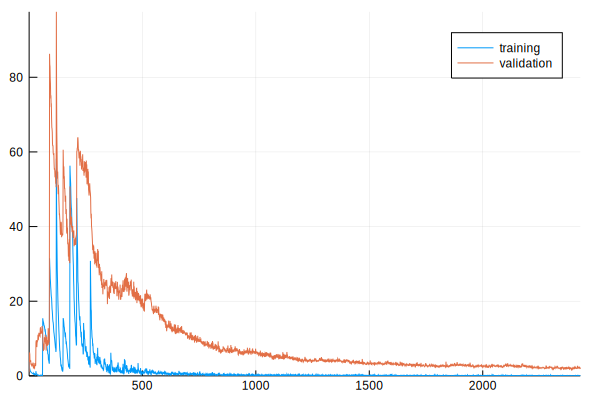

 52.815089 seconds (55.86 M allocations: 4.807 GiB, 3.47% gc time)


Progress:  81%|█████████████████████████████████        |  ETA: 3:13:50

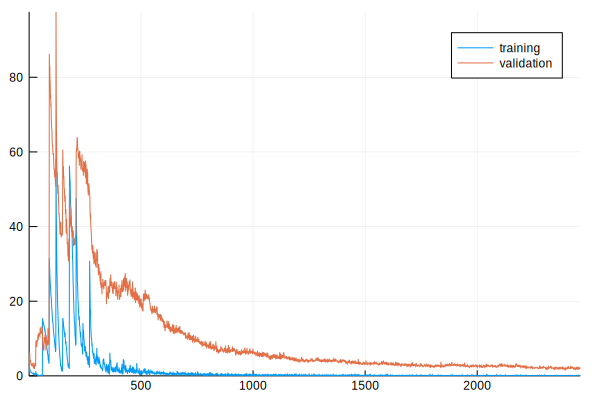

 52.837933 seconds (56.67 M allocations: 4.876 GiB, 2.51% gc time)


Progress:  82%|██████████████████████████████████       |  ETA: 3:03:56

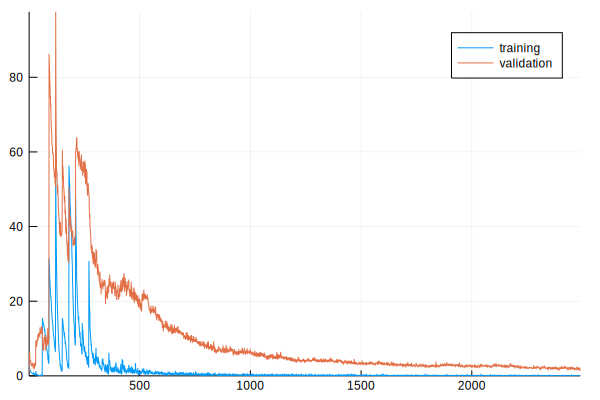

 54.408225 seconds (57.26 M allocations: 4.927 GiB, 3.49% gc time)


Progress:  83%|██████████████████████████████████       |  ETA: 2:53:29

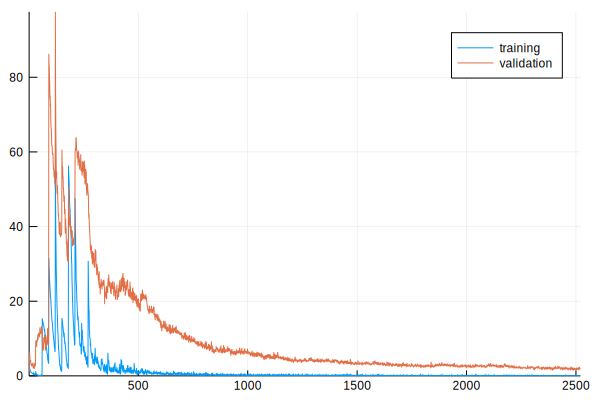

 54.237284 seconds (57.90 M allocations: 4.982 GiB, 2.37% gc time)


Progress:  84%|██████████████████████████████████       |  ETA: 2:43:15

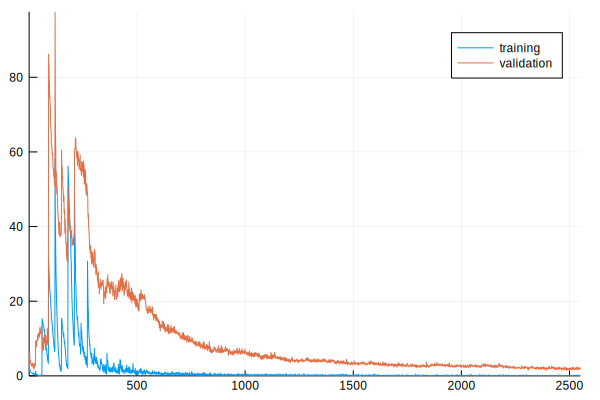

 55.600668 seconds (58.69 M allocations: 5.049 GiB, 3.21% gc time)


Progress:  85%|███████████████████████████████████      |  ETA: 2:33:19

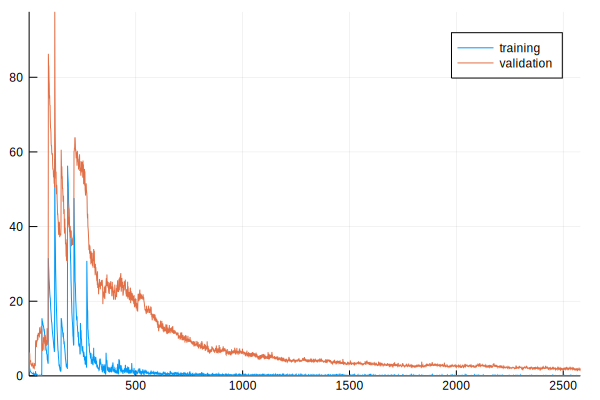

 56.662674 seconds (59.45 M allocations: 5.114 GiB, 3.47% gc time)


Progress:  86%|███████████████████████████████████      |  ETA: 2:23:17

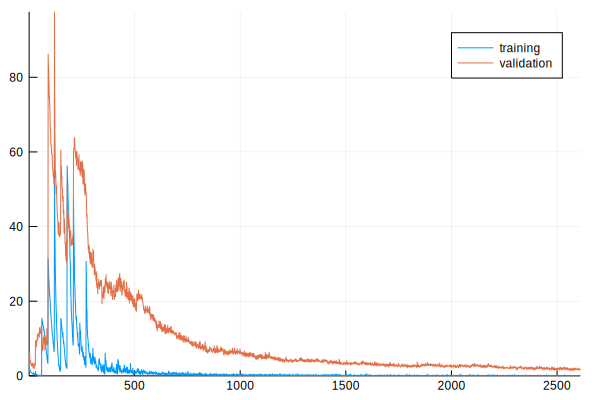

 56.602542 seconds (59.77 M allocations: 5.142 GiB, 3.23% gc time)


Progress:  87%|████████████████████████████████████     |  ETA: 2:12:39

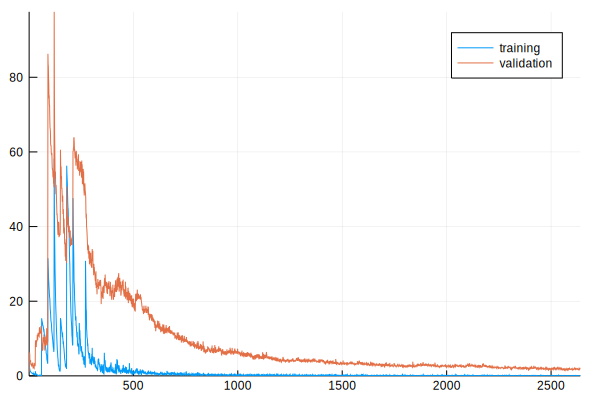

 57.359265 seconds (60.55 M allocations: 5.209 GiB, 3.34% gc time)


Progress:  88%|████████████████████████████████████     |  ETA: 2:02:45

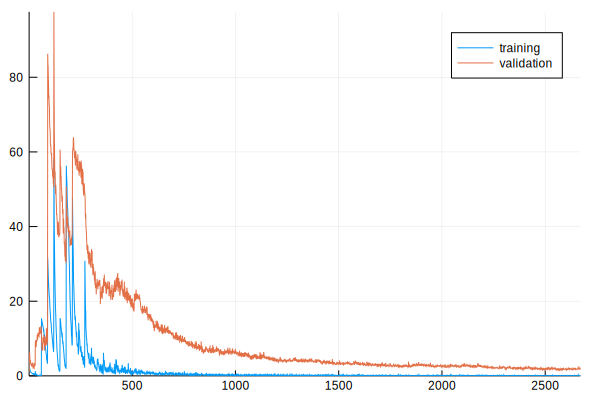

 57.801532 seconds (61.33 M allocations: 5.277 GiB, 2.65% gc time)


Progress:  89%|████████████████████████████████████     |  ETA: 1:52:42

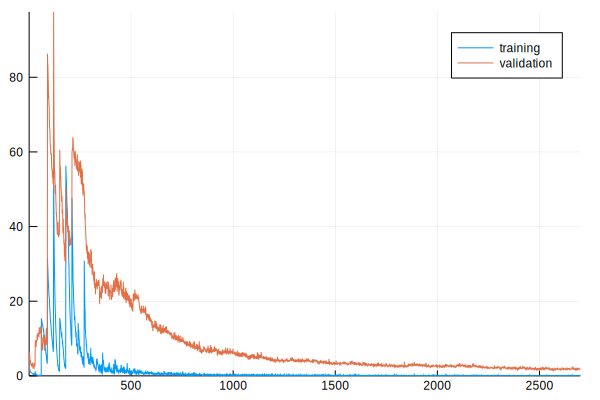

 57.971963 seconds (62.12 M allocations: 5.344 GiB, 2.55% gc time)


Progress:  90%|█████████████████████████████████████    |  ETA: 1:42:32

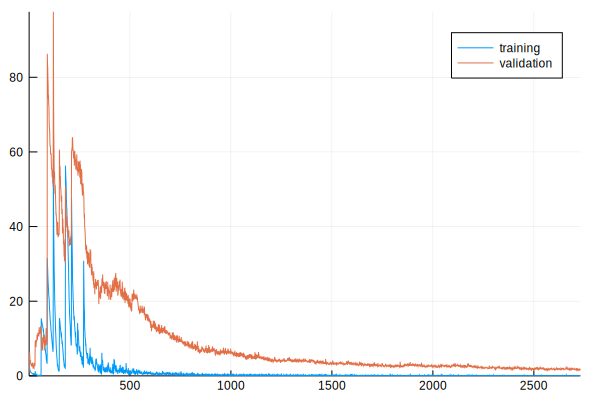

 59.166302 seconds (62.69 M allocations: 5.394 GiB, 3.24% gc time)


Progress:  91%|█████████████████████████████████████    |  ETA: 1:32:15

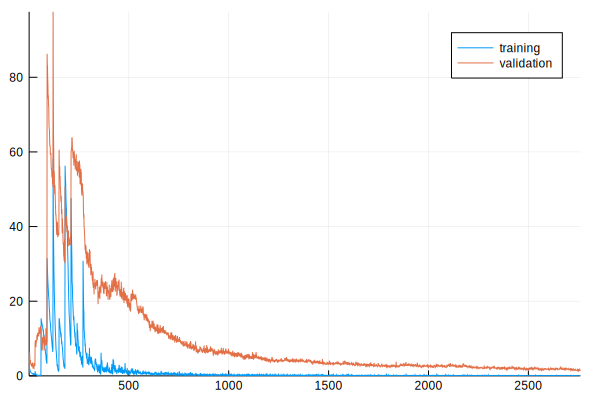

 58.902597 seconds (63.34 M allocations: 5.449 GiB, 2.40% gc time)


Progress:  92%|██████████████████████████████████████   |  ETA: 1:22:02

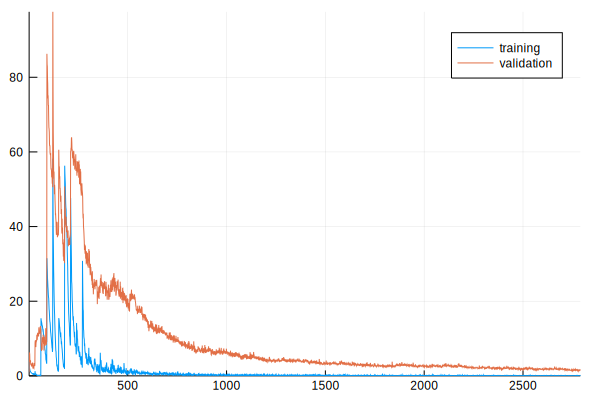

 59.638309 seconds (63.93 M allocations: 5.501 GiB, 2.39% gc time)


Progress:  93%|██████████████████████████████████████   |  ETA: 1:11:50

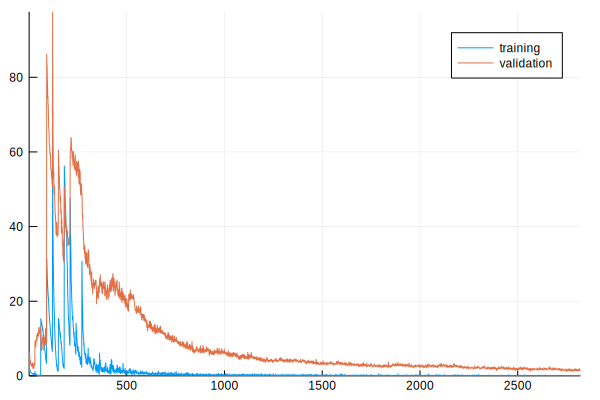

 61.251303 seconds (64.81 M allocations: 5.577 GiB, 3.34% gc time)


Progress:  94%|███████████████████████████████████████  |  ETA: 1:01:44

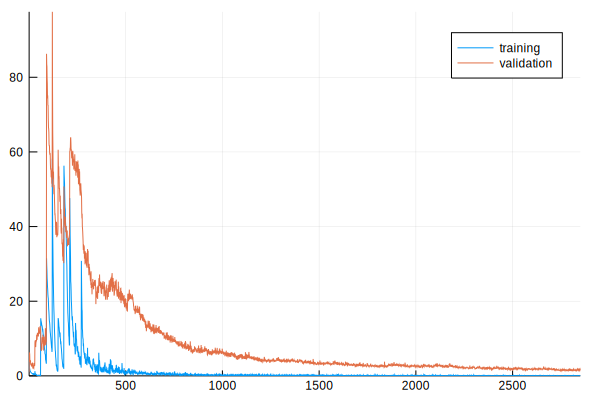

 61.975848 seconds (65.62 M allocations: 5.646 GiB, 3.41% gc time)


Progress:  95%|███████████████████████████████████████  |  ETA: 0:51:34

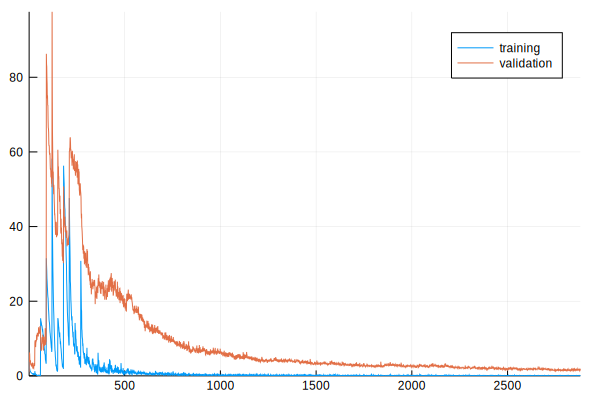

 62.890012 seconds (66.40 M allocations: 5.714 GiB, 3.64% gc time)


Progress:  96%|███████████████████████████████████████  |  ETA: 0:41:21

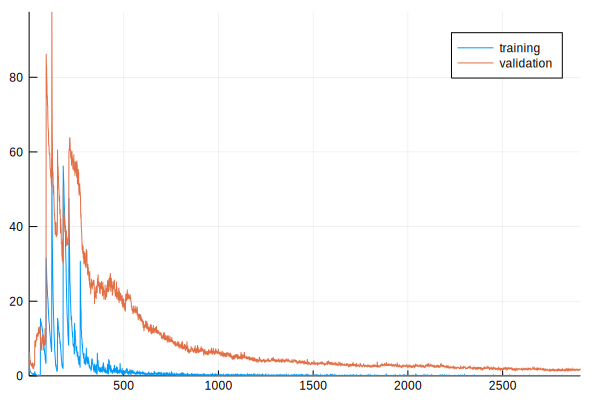

 63.093891 seconds (67.11 M allocations: 5.775 GiB, 2.97% gc time)


Progress:  97%|████████████████████████████████████████ |  ETA: 0:31:03

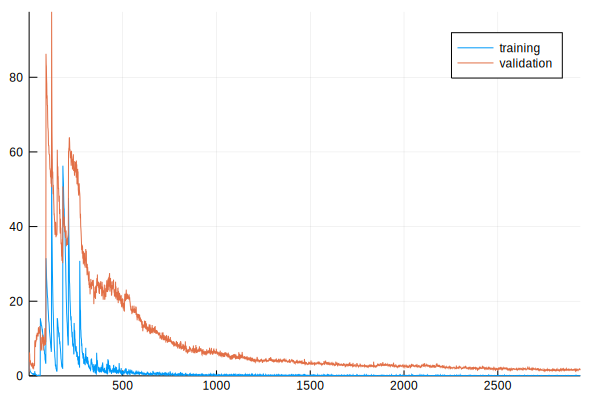

 63.591019 seconds (67.96 M allocations: 5.848 GiB, 2.39% gc time)


Progress:  98%|████████████████████████████████████████ |  ETA: 0:20:46

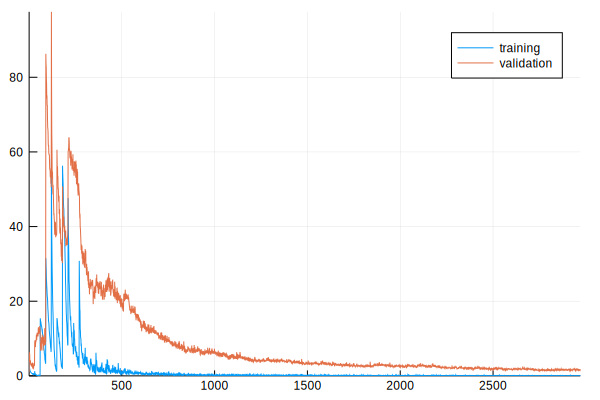

 63.978556 seconds (68.71 M allocations: 5.912 GiB, 2.39% gc time)


Progress:  99%|█████████████████████████████████████████|  ETA: 0:10:23

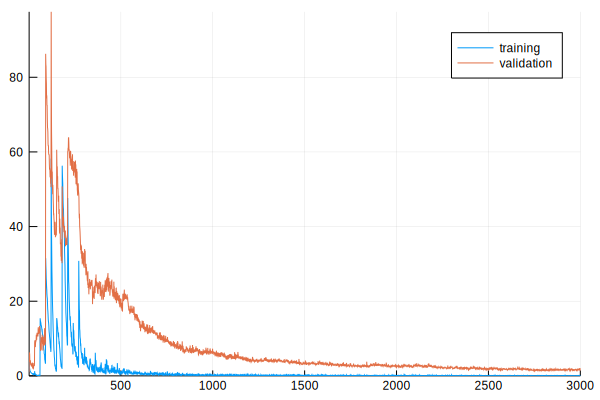

 65.792547 seconds (69.39 M allocations: 5.971 GiB, 3.54% gc time)


Progress: 100%|█████████████████████████████████████████| Time: 17:18:57


In [6]:
datasets = Vector{LearningMPC.Dataset{Float64}}()
all_training_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
all_validation_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
losses = Vector{Tuple{Float64, Float64}}()

N_iter = 100
σv = 3.0

@showprogress for i in 1:N_iter
    dataset = LearningMPC.Dataset(lqrsol)
    for i in 1:2
        collect_into!(dataset.training_data)
    end
    collect_into!(dataset.testing_data, i / N_iter * σv)
    collect_into!(dataset.validation_data, i / N_iter * σv)
    append!(all_training_data, features.(dataset.training_data))
    append!(all_validation_data, features.(dataset.validation_data))
    filter!(all_training_data) do sample
        all(isfinite, sample[1]) && isfinite(sample[2]) && isfinite(sample[3])
    end
    filter!(all_validation_data) do sample
        all(isfinite, sample[1]) && isfinite(sample[2]) && isfinite(sample[3])
    end
    
    @time for i in 1:30
        Flux.train!(loss, shuffleobs(all_training_data), optimizer)
        push!(losses, 
            (mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_training_data),
             mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_validation_data)))
    end
    push!(datasets, dataset)
    
    jldopen("boxatlas.jld2", "w") do file
        file["datasets"] = datasets
        file["net"] = net
        file["lqrsol"] = lqrsol
        file["mpc_params"] = Dict(
            "Δt" => params.Δt,
            "horizon" => params.horizon,
        )
        file["all_training_data"] = all_training_data
        file["all_validation_data"] = all_validation_data
        file["losses"] = losses
    end
    
    plt = plot(first.(losses), label="training")
    plot!(plt, last.(losses), label="validation")
    ylims!(plt, (0, ylims(plt)[2]))
    display(plt)
end

In [27]:
# x0 = nominal_state(robot)
# set_velocity!(x0, findjoint(robot.mechanism, "floating_base"), [2, 0, 0])
results = LCPSim.simulate(x0, net_mpc_controller, environment(robot), 0.01, 300, params.lcp_solver);

In [28]:
set_configuration!(mvis, configuration(results[1].state))

In [29]:
playback(mvis, results, 0.01)